In [1]:
!pip3 install -U ucimlrepo 
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import timeit



In [3]:
from ucimlrepo import fetch_ucirepo

#Loads the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

#X contains the independent variables and y contains the dependent variables
X = heart_disease.data.features
y = heart_disease.data.targets

#Create the DataFrame for the dataset
variables_df = pd.DataFrame(heart_disease.variables)

#Extract the names of the feature columns
feature_columns = variables_df[variables_df['role'] == 'Feature']['name'].tolist()

#Create a DataFrame with the features
df = pd.DataFrame(X, columns=feature_columns)

#Add the target variable to the DataFrame
df['target'] = y

#Display the first few rows of the DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [4]:
#Data Preprocessing 

#Handle missing values if any
df = df.dropna()

#Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

#Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Model Training and Evaluation
def train_and_evaluate_model(model, model_name):    
    # Train model
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()

    #Predict on the test set
    y_pred_svm = model.predict(X_test)

    #Evaluate the model
    model_results = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='weighted'),  # or 'micro', 'macro', etc.
        'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'F1':  f1_score(y_test, y_pred_svm, average='weighted')
    }])
    print(model_results.to_string(index=False))
    return model_results


In [6]:
#Train an SVM model
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm_results = train_and_evaluate_model(svm, 'SVM')

Model  Runtime  Accuracy  Precision   Recall       F1
  SVM 0.005413  0.633333   0.517355 0.633333 0.566934


/home/parallels/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
#Baseline Models:Neural Network
from sklearn.neural_network import MLPClassifier

#Train a Neural Network model
nn = MLPClassifier(random_state=42)
nn_results = train_and_evaluate_model(nn, 'Neural Network')

         Model  Runtime  Accuracy  Precision   Recall       F1
Neural Network 0.155253  0.616667   0.576026 0.616667 0.594813


/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
#Baseline Models: Random Forest

from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf_results = train_and_evaluate_model(rf, 'Random Forest')

        Model  Runtime  Accuracy  Precision  Recall       F1
Random Forest 0.057707       0.6   0.459574     0.6 0.520482


In [9]:
#Baseline Models: KNN

from sklearn.neighbors import KNeighborsClassifier

#Train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn_results = train_and_evaluate_model(knn, 'K-Nearest Neighbors')

              Model  Runtime  Accuracy  Precision  Recall       F1
K-Nearest Neighbors 0.000333      0.65   0.569444    0.65 0.597003


/home/parallels/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              Model  Runtime  Accuracy  Precision   Recall       F1
                SVM 0.005413  0.633333   0.517355 0.633333 0.566934
     Neural Network 0.155253  0.616667   0.576026 0.616667 0.594813
      Random Forest 0.057707  0.600000   0.459574 0.600000 0.520482
K-Nearest Neighbors 0.000333  0.650000   0.569444 0.650000 0.597003


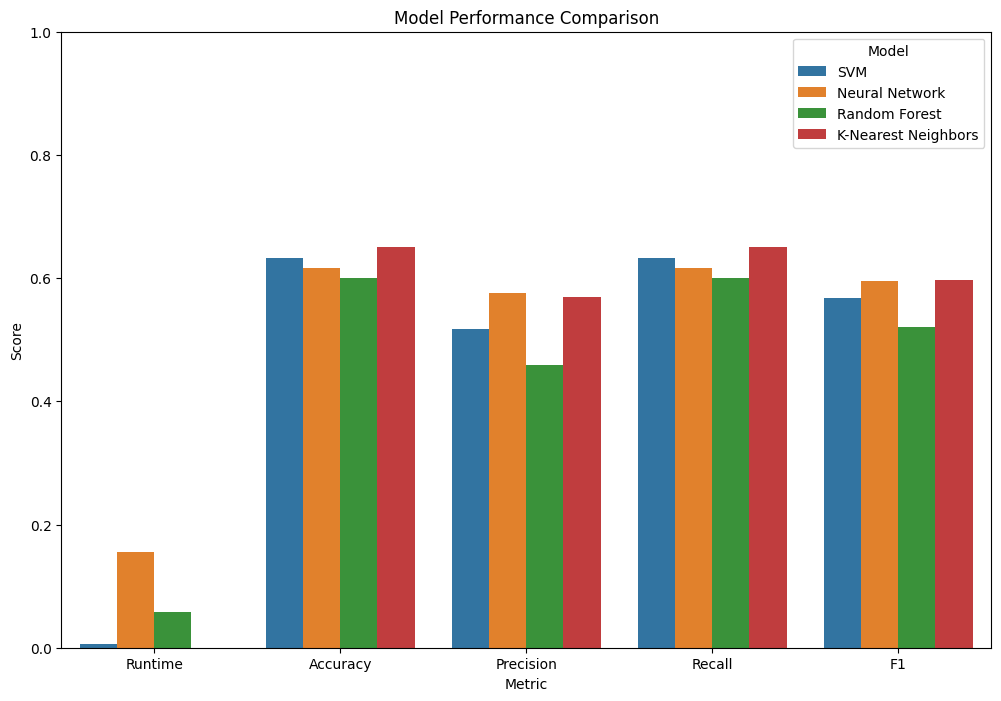

In [10]:
#Summarize the performance of all models
performance = pd.concat([svm_results, nn_results, rf_results, knn_results], ignore_index=True)

#Print the performance DataFrame
print(performance.to_string(index=False))

#Pivot the DataFrame to have metrics as rows and models as columns
performance_pivot = performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

#Plot the performance metrics for comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_pivot)
plt.ylim(0, 1)  # Adjust the y-axis limits to reduce vertical space
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()
